In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify as sq

In [1]:
pip install squarify

In [3]:
df = pd.read_excel("Online Retail.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df.shape

(541909, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
df = df.drop(['StockCode', 'CustomerID'], axis = 1)
df.head()

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom


In [8]:
df['Description'] = df['Description'].str.strip()
df.head()

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom


In [10]:
df.isnull().sum()

InvoiceNo         0
Description    1455
Quantity          0
InvoiceDate       0
UnitPrice         0
Country           0
dtype: int64

In [12]:
df.dropna(inplace = True)
df.shape

(540454, 6)

In [13]:
(df["InvoiceNo"].str.contains("C")).value_counts()

True     9288
False       3
Name: InvoiceNo, dtype: int64

In [14]:
df['InvoiceNo']=df['InvoiceNo'].astype(str)
df=df[~df["InvoiceNo"].str.contains("C")]
df.shape

(531166, 6)

In [15]:
df_duplicates = df[df.duplicated()]
df_duplicates

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,Country
517,536409,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,United Kingdom
527,536409,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,United Kingdom
537,536409,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,United Kingdom
539,536409,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,United Kingdom
555,536412,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,United Kingdom
...,...,...,...,...,...,...
541675,581538,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,United Kingdom
541689,581538,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,United Kingdom
541692,581538,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,United Kingdom
541699,581538,WICKER STAR,1,2011-12-09 11:34:00,2.10,United Kingdom


In [16]:
df = df.drop(df_duplicates.index)
df.shape

(525856, 6)

In [17]:
postage = df["Description"]=='POSTAGE'
postage.value_counts()

False    524730
True       1126
Name: Description, dtype: int64

In [18]:
df= df.drop(df[postage].index)
df.shape

(524730, 6)

In [19]:
df["Country"].value_counts()

United Kingdom          480895
Germany                   8653
France                    8093
EIRE                      7883
Spain                     2418
Netherlands               2326
Belgium                   1935
Switzerland               1928
Portugal                  1462
Australia                 1183
Norway                    1052
Channel Islands            747
Italy                      741
Finland                    648
Cyprus                     601
Unspecified                442
Sweden                     428
Austria                    384
Denmark                    367
Poland                     325
Japan                      321
Israel                     291
Hong Kong                  278
Singapore                  222
Iceland                    182
USA                        179
Canada                     150
Greece                     142
Malta                      109
United Arab Emirates        67
RSA                         58
European Community          57
Lebanon 

In [21]:
country_list = ["Germany","France","Spain","Netherlands","Belgium"]
df = df.loc[df["Country"].isin(country_list)].reset_index().drop('index', axis=1)

In [22]:
df.shape

(23425, 6)

In [23]:
df.head()

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,Country
0,536370,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,France
1,536370,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,France
2,536370,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,France
3,536370,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,France
4,536370,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,France


In [ ]:
##EDA

In [24]:
df['Total Price']= df['Quantity']*df['UnitPrice']
df.head()

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,Country,Total Price
0,536370,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,France,90.0
1,536370,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,France,90.0
2,536370,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,France,45.0
3,536370,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,France,10.2
4,536370,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,France,15.6


In [25]:
df['Year']=df['InvoiceDate'].dt.year
df['Month']=df['InvoiceDate'].dt.month
df['Hour']=df['InvoiceDate'].dt.hour
df['DayofWeek']=df['InvoiceDate'].dt.dayofweek
df['DayName']=df['InvoiceDate'].dt.day_name()

In [26]:
df.sample(5)

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,Country,Total Price,Year,Month,Hour,DayofWeek,DayName
7885,553842,PACK OF 12 RED RETROSPOT TISSUES,48,2011-05-19 12:24:00,0.29,Germany,13.92,2011,5,12,3,Thursday
5297,547520,ROUND CONTAINER SET OF 5 RETROSPOT,12,2011-03-23 14:55:00,1.65,France,19.80,2011,3,14,2,Wednesday
21417,577344,CAKE STAND 3 TIER MAGIC GARDEN,3,2011-11-18 15:14:00,12.75,France,38.25,2011,11,15,4,Friday
22814,580536,JUMBO BAG VINTAGE LEAF,10,2011-12-04 16:07:00,2.08,France,20.80,2011,12,16,6,Sunday
21098,576910,PACK OF 72 RETROSPOT CAKE CASES,24,2011-11-17 09:51:00,0.55,Germany,13.20,2011,11,9,3,Thursday


In [27]:
day_names = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
df['DayName']= pd.Categorical(df['DayName'],categories=day_names,ordered =True)

Text(0, 0.5, 'Total Sales')

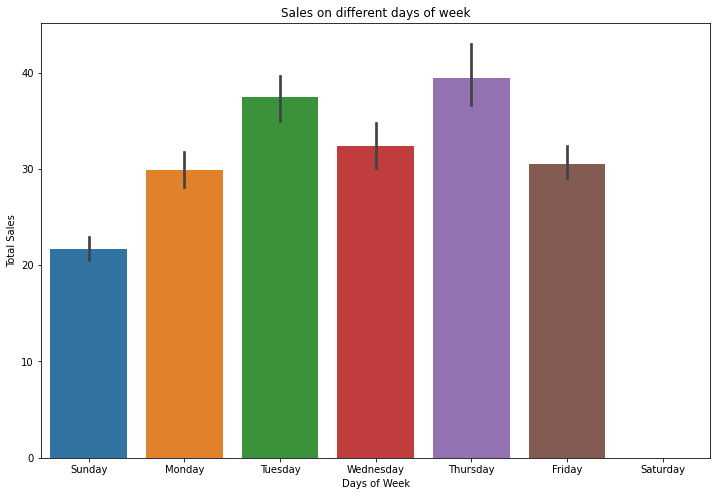

In [30]:
plt.figure(figsize = (12,8))
sns.barplot(x='DayName', y='Total Price', data =df)
plt.title('Sales on different days of week')
plt.xlabel('Days of Week')
plt.ylabel('Total Sales')

In [31]:
pivot_df = df.pivot_table(index='Month',columns='DayName',values='Total Price',aggfunc='mean')
pivot_df

DayName,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday
Month,,,,,,
1,26.025000,24.766365,46.299746,40.338789,22.085097,38.347284
2,23.150000,74.194207,45.645154,18.233016,22.741106,25.395356
3,19.602969,18.164542,57.338449,27.440779,37.088345,27.024802
4,18.649273,20.037667,44.058643,30.422222,22.354359,23.642424
5,18.302639,21.383593,22.520855,34.793415,71.900937,24.977168
6,40.425342,18.821746,73.415069,38.850478,16.218297,31.145503
7,17.645641,32.434065,16.347103,19.859714,28.868000,18.439963
8,12.416514,24.139852,45.434715,29.926565,52.648891,39.625314
9,17.497778,60.180836,54.367273,18.050346,26.593925,23.590600


Text(87.0, 0.5, 'Months Represented')

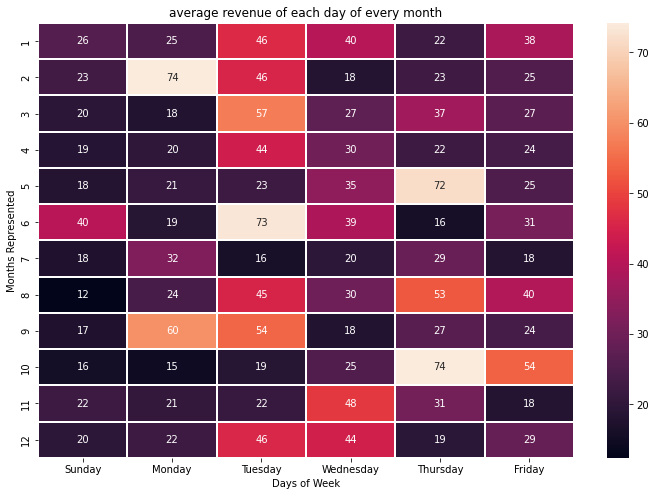

In [32]:
plt.figure(figsize = (12,8))
sns.heatmap(data =pivot_df, linewidths = 1, annot = True)
plt.title('average revenue of each day of every month')
plt.xlabel('Days of Week')
plt.ylabel('Months Represented')

Text(0, 0.5, 'Frequency')

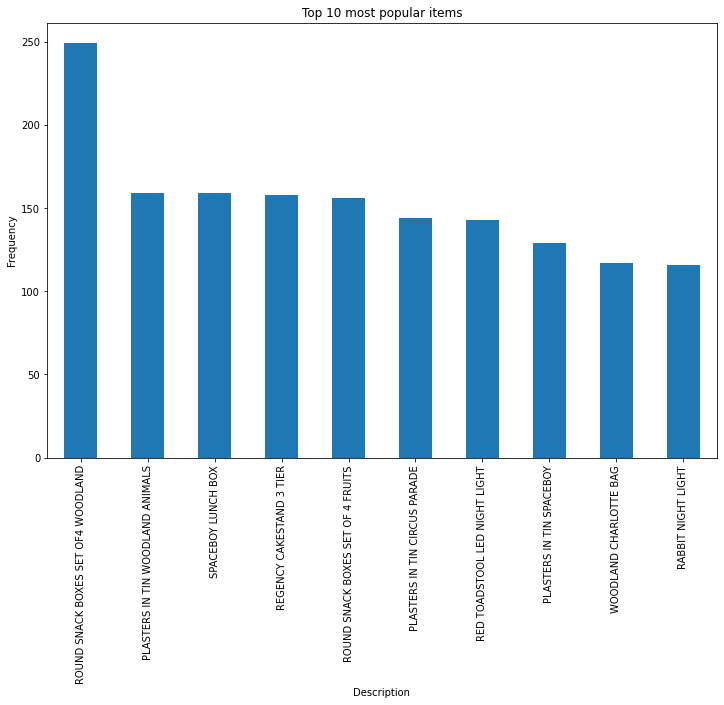

In [35]:
fig,ax = plt.subplots(figsize = (12,8))
df['Description'].value_counts().sort_values(ascending= False).head(10).plot.bar()
plt.title('Top 10 most popular items')
plt.xlabel('Description')
plt.ylabel('Frequency')

Text(0.5, 1.0, 'Top 10 most popular items')

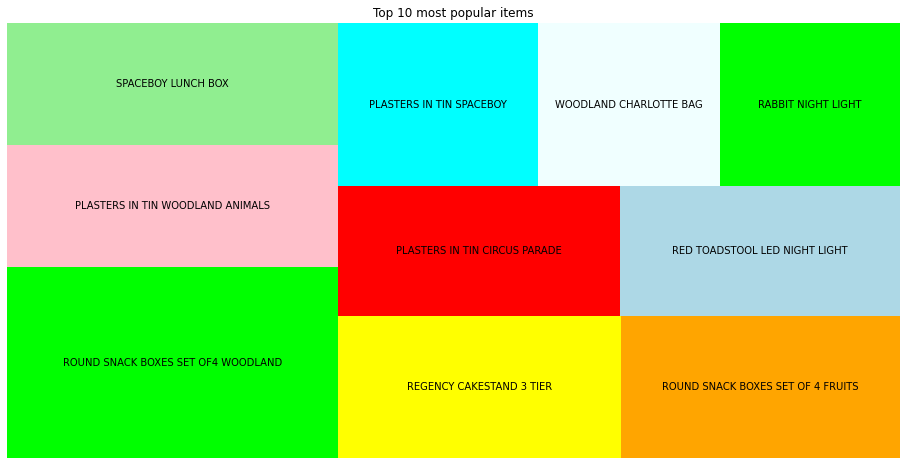

In [36]:
plt.figure(figsize = (16,8))
x=df['Description'].value_counts().sort_values(ascending= False).head(10)
color = ["lime","pink","lightgreen","yellow","orange","red","lightblue","cyan","azure"]
sq.plot(sizes =x, label=x.index,color=color).axis('off')
plt.title('Top 10 most popular items')


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23425 entries, 0 to 23424
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    23425 non-null  object        
 1   Description  23425 non-null  object        
 2   Quantity     23425 non-null  int64         
 3   InvoiceDate  23425 non-null  datetime64[ns]
 4   UnitPrice    23425 non-null  float64       
 5   Country      23425 non-null  object        
 6   Total Price  23425 non-null  float64       
 7   Year         23425 non-null  int64         
 8   Month        23425 non-null  int64         
 9   Hour         23425 non-null  int64         
 10  DayofWeek    23425 non-null  int64         
 11  DayName      23425 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(2), int64(5), object(3)
memory usage: 2.0+ MB


In [38]:
df= df.drop(['Quantity','InvoiceDate','UnitPrice','Country','Total Price','Year','Month','Hour','DayofWeek','DayName'],axis =1)
df.head()

,InvoiceNo,Description
0,536370,ALARM CLOCK BAKELIKE PINK
1,536370,ALARM CLOCK BAKELIKE RED
2,536370,ALARM CLOCK BAKELIKE GREEN
3,536370,PANDA AND BUNNIES STICKER SHEET
4,536370,STARS GIFT TAPE


In [ ]:
#Market Basket Analysis

In [43]:
item_per_transaction = df.groupby("InvoiceNo").agg(",".join).reset_index()

In [44]:
item_per_transaction.head()

,InvoiceNo,Description
0,536370,"ALARM CLOCK BAKELIKE PINK,ALARM CLOCK BAKELIKE..."
1,536403,HAND WARMER BIRD DESIGN
2,536527,"SET OF 6 T-LIGHTS SANTA,ROTATING SILVER ANGELS..."
3,536840,"JAM MAKING SET PRINTED,JAM JAR WITH PINK LID,J..."
4,536852,"PICTURE DOMINOES,MINI JIGSAW SPACEBOY,MINI JIG..."


In [45]:
item_per_transaction.to_csv("Items_per_transaction.csv",index = False)

In [47]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

In [49]:
items_list=[items.split(',')for items in item_per_transaction.Description]

In [50]:
items_list

[['ALARM CLOCK BAKELIKE PINK',
  'ALARM CLOCK BAKELIKE RED',
  'ALARM CLOCK BAKELIKE GREEN',
  'PANDA AND BUNNIES STICKER SHEET',
  'STARS GIFT TAPE',
  'INFLATABLE POLITICAL GLOBE',
  'VINTAGE HEADS AND TAILS CARD GAME',
  'SET/2 RED RETROSPOT TEA TOWELS',
  'ROUND SNACK BOXES SET OF4 WOODLAND',
  'SPACEBOY LUNCH BOX',
  'LUNCH BOX I LOVE LONDON',
  'CIRCUS PARADE LUNCH BOX',
  'CHARLOTTE BAG DOLLY GIRL DESIGN',
  'RED TOADSTOOL LED NIGHT LIGHT',
  'SET 2 TEA TOWELS I LOVE LONDON',
  'VINTAGE SEASIDE JIGSAW PUZZLES',
  'MINI JIGSAW CIRCUS PARADE',
  'MINI JIGSAW SPACEBOY',
  'MINI PAINT SET VINTAGE'],
 ['HAND WARMER BIRD DESIGN'],
 ['SET OF 6 T-LIGHTS SANTA',
  'ROTATING SILVER ANGELS T-LIGHT HLDR',
  'MULTI COLOUR SILVER T-LIGHT HOLDER',
  '5 HOOK HANGER MAGIC TOADSTOOL',
  '3 HOOK HANGER MAGIC GARDEN',
  '5 HOOK HANGER RED MAGIC TOADSTOOL',
  'ASSORTED COLOUR LIZARD SUCTION HOOK',
  'JUMBO BAG WOODLAND ANIMALS',
  'JUMBO BAG OWLS',
  'HOT WATER BOTTLE BABUSHKA',
  'HOMEMADE JAM SCEN

In [51]:
te = TransactionEncoder()
te_array= te.fit(items_list).transform(items_list)
te_array

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [52]:
items_df = pd.DataFrame(te_array,columns = te.columns_)
items_df

,,1 HANGER,BACK DOOR,BILLBOARD FONTS DESIGN,BIRTHDAY CARD,BREAKFAST IN BED,CHOCOLATE SPOTS,DOUGHNUTS,NEW ENGLAND,OVERCROWDED POOL.,...,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1112,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1113,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1114,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [54]:
items_df[""].value_counts()

False    1092
True       24
Name: , dtype: int64

In [55]:
items_df = items_df.drop("",axis =1)
items_df.shape

(1116, 2368)

In [57]:
spaceboy_box_df = items_df[items_df['SPACEBOY LUNCH BOX']== True]
spaceboy_box_df[['SPACEBOY LUNCH BOX']]

,SPACEBOY LUNCH BOX
0,True
14,True
48,True
57,True
71,True
...,...
1052,True
1083,True
1106,True
1107,True


In [60]:
spaceboy_dolly = items_df[(items_df['SPACEBOY LUNCH BOX']== True) & (items_df['DOLLY GIRL LUNCH BOX']== True)]
spaceboy_dolly[['SPACEBOY LUNCH BOX','DOLLY GIRL LUNCH BOX']]

,SPACEBOY LUNCH BOX,DOLLY GIRL LUNCH BOX
48,True,True
74,True,True
87,True,True
96,True,True
105,True,True
...,...,...
993,True,True
997,True,True
1017,True,True
1029,True,True


In [61]:
pd.set_option('display.max_colwidth',None)

In [62]:
frequent_items = apriori(items_df,min_support = 0.1,use_colnames = True)
frequent_items

,support,itemsets
0,0.103047,(PACK OF 72 RETROSPOT CAKE CASES)
1,0.129032,(PLASTERS IN TIN CIRCUS PARADE)
2,0.115591,(PLASTERS IN TIN SPACEBOY)
3,0.142473,(PLASTERS IN TIN WOODLAND ANIMALS)
4,0.103943,(RABBIT NIGHT LIGHT)
5,0.128136,(RED TOADSTOOL LED NIGHT LIGHT)
6,0.141577,(REGENCY CAKESTAND 3 TIER)
7,0.139785,(ROUND SNACK BOXES SET OF 4 FRUITS)
8,0.223118,(ROUND SNACK BOXES SET OF4 WOODLAND)
9,0.142473,(SPACEBOY LUNCH BOX)


In [63]:
frequent_items.sort_values("support",ascending = False)

,support,itemsets
8,0.223118,(ROUND SNACK BOXES SET OF4 WOODLAND)
3,0.142473,(PLASTERS IN TIN WOODLAND ANIMALS)
9,0.142473,(SPACEBOY LUNCH BOX)
6,0.141577,(REGENCY CAKESTAND 3 TIER)
7,0.139785,(ROUND SNACK BOXES SET OF 4 FRUITS)
1,0.129032,(PLASTERS IN TIN CIRCUS PARADE)
5,0.128136,(RED TOADSTOOL LED NIGHT LIGHT)
2,0.115591,(PLASTERS IN TIN SPACEBOY)
11,0.107527,"(ROUND SNACK BOXES SET OF 4 FRUITS, ROUND SNACK BOXES SET OF4 WOODLAND)"
10,0.104839,(WOODLAND CHARLOTTE BAG)


In [ ]:
#we can see that in 22% of the transactions we can find round snack boxes ,set of 4 woodland

In [65]:
frequent_items = apriori(items_df,min_support = 0.05,use_colnames = True)
frequent_items.sort_values("support",ascending = False)

,support,itemsets
43,0.223118,(ROUND SNACK BOXES SET OF4 WOODLAND)
52,0.142473,(SPACEBOY LUNCH BOX)
32,0.142473,(PLASTERS IN TIN WOODLAND ANIMALS)
39,0.141577,(REGENCY CAKESTAND 3 TIER)
42,0.139785,(ROUND SNACK BOXES SET OF 4 FRUITS)
...,...,...
16,0.051075,(JAM MAKING SET WITH JARS)
51,0.050179,(SPACEBOY CHILDRENS BOWL)
44,0.050179,(SET OF 2 TEA TOWELS APPLE AND PEARS)
55,0.050179,"(ALARM CLOCK BAKELIKE RED, ALARM CLOCK BAKELIKE GREEN)"


In [66]:
frequent_items = apriori(items_df,min_support = 0.02,use_colnames = True)
frequent_items.sort_values("support",ascending = False)

,support,itemsets
197,0.223118,(ROUND SNACK BOXES SET OF4 WOODLAND)
247,0.142473,(SPACEBOY LUNCH BOX)
154,0.142473,(PLASTERS IN TIN WOODLAND ANIMALS)
183,0.141577,(REGENCY CAKESTAND 3 TIER)
196,0.139785,(ROUND SNACK BOXES SET OF 4 FRUITS)
...,...,...
301,0.020609,"(CHARLOTTE BAG DOLLY GIRL DESIGN, DOLLY GIRL LUNCH BOX)"
296,0.020609,"(PLASTERS IN TIN WOODLAND ANIMALS, CHARLOTTE BAG APPLES DESIGN)"
285,0.020609,"(ALARM CLOCK BAKELIKE RED, PLASTERS IN TIN SPACEBOY)"
415,0.020609,"(LUNCH BAG RED RETROSPOT, RED RETROSPOT PICNIC BAG)"


In [67]:
assoc_rules = association_rules(frequent_items,metric = 'support',min_threshold = 0.10)
assoc_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ROUND SNACK BOXES SET OF 4 FRUITS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.139785,0.223118,0.107527,0.769231,3.447637,0.076338,3.366487
1,(ROUND SNACK BOXES SET OF4 WOODLAND),(ROUND SNACK BOXES SET OF 4 FRUITS),0.223118,0.139785,0.107527,0.481928,3.447637,0.076338,1.660415


In [68]:
assoc_rules = association_rules(frequent_items,metric = 'confidence',min_threshold = 1)
assoc_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(SPACEBOY CHILDRENS BOWL, DOLLY GIRL CHILDRENS CUP)",(DOLLY GIRL CHILDRENS BOWL),0.027778,0.037634,0.027778,1.0,26.571429,0.026732,inf
1,"(SPACEBOY CHILDRENS CUP, DOLLY GIRL CHILDRENS BOWL)",(DOLLY GIRL CHILDRENS CUP),0.025090,0.034946,0.025090,1.0,28.615385,0.024213,inf
2,"(PACK OF 6 SKULL PAPER PLATES, SET/6 RED SPOTTY PAPER CUPS)",(SET/6 RED SPOTTY PAPER PLATES),0.021505,0.077957,0.021505,1.0,12.827586,0.019829,inf
3,"(SPACEBOY CHILDRENS BOWL, SPACEBOY CHILDRENS CUP, DOLLY GIRL CHILDRENS BOWL)",(DOLLY GIRL CHILDRENS CUP),0.024194,0.034946,0.024194,1.0,28.615385,0.023348,inf
4,"(SPACEBOY CHILDRENS BOWL, SPACEBOY CHILDRENS CUP, DOLLY GIRL CHILDRENS CUP)",(DOLLY GIRL CHILDRENS BOWL),0.024194,0.037634,0.024194,1.0,26.571429,0.023283,inf


In [69]:
assoc_rules = association_rules(frequent_items,metric = 'confidence',min_threshold = 0.9)
assoc_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(DOLLY GIRL CHILDRENS CUP),(DOLLY GIRL CHILDRENS BOWL),0.034946,0.037634,0.032258,0.923077,24.527473,0.030943,12.510753
1,(JAM JAR WITH GREEN LID),(JAM JAR WITH PINK LID),0.022401,0.041219,0.021505,0.960000,23.290435,0.020582,23.969534
2,"(SPACEBOY CHILDRENS BOWL, DOLLY GIRL CHILDRENS CUP)",(DOLLY GIRL CHILDRENS BOWL),0.027778,0.037634,0.027778,1.000000,26.571429,0.026732,inf
3,"(SPACEBOY CHILDRENS CUP, DOLLY GIRL CHILDRENS BOWL)",(DOLLY GIRL CHILDRENS CUP),0.025090,0.034946,0.025090,1.000000,28.615385,0.024213,inf
4,"(SPACEBOY CHILDRENS CUP, DOLLY GIRL CHILDRENS CUP)",(DOLLY GIRL CHILDRENS BOWL),0.027778,0.037634,0.025090,0.903226,24.000000,0.024044,9.944444
5,"(ROUND SNACK BOXES SET OF4 WOODLAND, DOLLY GIRL CHILDRENS BOWL)",(SPACEBOY CHILDRENS BOWL),0.021505,0.050179,0.020609,0.958333,19.098214,0.019530,22.795699
6,"(SPACEBOY CHILDRENS CUP, DOLLY GIRL CHILDRENS BOWL)",(SPACEBOY CHILDRENS BOWL),0.025090,0.050179,0.024194,0.964286,19.216837,0.022935,26.594982
7,"(LUNCH BAG SPACEBOY DESIGN, PLASTERS IN TIN WOODLAND ANIMALS)",(PLASTERS IN TIN SPACEBOY),0.027778,0.115591,0.025986,0.935484,8.093023,0.022775,13.708333
8,"(PACK OF 6 SKULL PAPER PLATES, PACK OF 20 SKULL PAPER NAPKINS)",(PACK OF 6 SKULL PAPER CUPS),0.027778,0.038530,0.025090,0.903226,23.441860,0.024019,9.935185
9,"(PACK OF 20 SKULL PAPER NAPKINS, PACK OF 6 SKULL PAPER CUPS)",(PACK OF 6 SKULL PAPER PLATES),0.027778,0.035842,0.025090,0.903226,25.200000,0.024094,9.962963


In [70]:
assoc_rules = association_rules(frequent_items,metric = 'lift',min_threshold = 28)
assoc_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(SPACEBOY CHILDRENS CUP, DOLLY GIRL CHILDRENS BOWL)",(DOLLY GIRL CHILDRENS CUP),0.025090,0.034946,0.025090,1.000000,28.615385,0.024213,inf
1,(DOLLY GIRL CHILDRENS CUP),"(SPACEBOY CHILDRENS CUP, DOLLY GIRL CHILDRENS BOWL)",0.034946,0.025090,0.025090,0.717949,28.615385,0.024213,3.456500
2,"(POPPY'S PLAYHOUSE BEDROOM, POPPY'S PLAYHOUSE KITCHEN)",(POPPY'S PLAYHOUSE LIVINGROOM),0.027778,0.025090,0.020609,0.741935,29.571429,0.019912,3.777778
3,(POPPY'S PLAYHOUSE LIVINGROOM),"(POPPY'S PLAYHOUSE BEDROOM, POPPY'S PLAYHOUSE KITCHEN)",0.025090,0.027778,0.020609,0.821429,29.571429,0.019912,5.444444
4,"(SPACEBOY CHILDRENS BOWL, SPACEBOY CHILDRENS CUP, DOLLY GIRL CHILDRENS BOWL)",(DOLLY GIRL CHILDRENS CUP),0.024194,0.034946,0.024194,1.000000,28.615385,0.023348,inf
5,"(SPACEBOY CHILDRENS BOWL, DOLLY GIRL CHILDRENS CUP)","(SPACEBOY CHILDRENS CUP, DOLLY GIRL CHILDRENS BOWL)",0.027778,0.025090,0.024194,0.870968,34.714286,0.023497,7.555556
6,"(SPACEBOY CHILDRENS CUP, DOLLY GIRL CHILDRENS BOWL)","(SPACEBOY CHILDRENS BOWL, DOLLY GIRL CHILDRENS CUP)",0.025090,0.027778,0.024194,0.964286,34.714286,0.023497,27.222222
7,(DOLLY GIRL CHILDRENS CUP),"(SPACEBOY CHILDRENS BOWL, SPACEBOY CHILDRENS CUP, DOLLY GIRL CHILDRENS BOWL)",0.034946,0.024194,0.024194,0.692308,28.615385,0.023348,3.171371


In [71]:
assoc_rules = association_rules(frequent_items,metric = 'support',min_threshold = 0.02)
assoc_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(REGENCY CAKESTAND 3 TIER),(6 RIBBONS RUSTIC CHARM),0.141577,0.067204,0.025090,0.177215,2.636962,0.015575,1.133706
1,(6 RIBBONS RUSTIC CHARM),(REGENCY CAKESTAND 3 TIER),0.067204,0.141577,0.025090,0.373333,2.636962,0.015575,1.369824
2,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE CHOCOLATE),0.069892,0.026882,0.021505,0.307692,11.446154,0.019627,1.405615
3,(ALARM CLOCK BAKELIKE CHOCOLATE),(ALARM CLOCK BAKELIKE RED),0.026882,0.069892,0.021505,0.800000,11.446154,0.019627,4.650538
4,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.078853,0.065412,0.043907,0.556818,8.512453,0.038749,2.108814
...,...,...,...,...,...,...,...,...,...
1183,"(PLASTERS IN TIN WOODLAND ANIMALS, PLASTERS IN TIN SPACEBOY)","(ROUND SNACK BOXES SET OF 4 FRUITS, ROUND SNACK BOXES SET OF4 WOODLAND)",0.077061,0.107527,0.021505,0.279070,2.595349,0.013219,1.237947
1184,(ROUND SNACK BOXES SET OF 4 FRUITS),"(ROUND SNACK BOXES SET OF4 WOODLAND, PLASTERS IN TIN WOODLAND ANIMALS, PLASTERS IN TIN SPACEBOY)",0.139785,0.040323,0.021505,0.153846,3.815385,0.015869,1.134164
1185,(ROUND SNACK BOXES SET OF4 WOODLAND),"(ROUND SNACK BOXES SET OF 4 FRUITS, PLASTERS IN TIN WOODLAND ANIMALS, PLASTERS IN TIN SPACEBOY)",0.223118,0.026882,0.021505,0.096386,3.585542,0.015508,1.076918
1186,(PLASTERS IN TIN WOODLAND ANIMALS),"(ROUND SNACK BOXES SET OF 4 FRUITS, ROUND SNACK BOXES SET OF4 WOODLAND, PLASTERS IN TIN SPACEBOY)",0.142473,0.029570,0.021505,0.150943,5.104631,0.017292,1.142951


In [72]:
assoc_rules[(assoc_rules['confidence']>=0.9) & (assoc_rules['lift']>=25)].sort_values('confidence',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
679,"(SPACEBOY CHILDRENS BOWL, DOLLY GIRL CHILDRENS CUP)",(DOLLY GIRL CHILDRENS BOWL),0.027778,0.037634,0.027778,1.000000,26.571429,0.026732,inf
684,"(SPACEBOY CHILDRENS CUP, DOLLY GIRL CHILDRENS BOWL)",(DOLLY GIRL CHILDRENS CUP),0.025090,0.034946,0.025090,1.000000,28.615385,0.024213,inf
1104,"(SPACEBOY CHILDRENS BOWL, SPACEBOY CHILDRENS CUP, DOLLY GIRL CHILDRENS BOWL)",(DOLLY GIRL CHILDRENS CUP),0.024194,0.034946,0.024194,1.000000,28.615385,0.023348,inf
1105,"(SPACEBOY CHILDRENS BOWL, SPACEBOY CHILDRENS CUP, DOLLY GIRL CHILDRENS CUP)",(DOLLY GIRL CHILDRENS BOWL),0.024194,0.037634,0.024194,1.000000,26.571429,0.023283,inf
1111,"(SPACEBOY CHILDRENS CUP, DOLLY GIRL CHILDRENS BOWL)","(SPACEBOY CHILDRENS BOWL, DOLLY GIRL CHILDRENS CUP)",0.025090,0.027778,0.024194,0.964286,34.714286,0.023497,27.222222
871,"(SET/6 RED SPOTTY PAPER PLATES, PACK OF 20 SKULL PAPER NAPKINS)",(PACK OF 6 SKULL PAPER PLATES),0.022401,0.035842,0.021505,0.960000,26.784000,0.020702,24.103943
1039,"(POPPY'S PLAYHOUSE BEDROOM, POPPY'S PLAYHOUSE LIVINGROOM)",(POPPY'S PLAYHOUSE KITCHEN),0.021505,0.037634,0.020609,0.958333,25.464286,0.019800,23.096774
1040,"(POPPY'S PLAYHOUSE KITCHEN, POPPY'S PLAYHOUSE LIVINGROOM)",(POPPY'S PLAYHOUSE BEDROOM),0.022401,0.034946,0.020609,0.920000,26.326154,0.019826,12.063172
866,"(PACK OF 20 SKULL PAPER NAPKINS, PACK OF 6 SKULL PAPER CUPS)",(PACK OF 6 SKULL PAPER PLATES),0.027778,0.035842,0.025090,0.903226,25.200000,0.024094,9.962963


Text(0, 0.5, 'confidence')

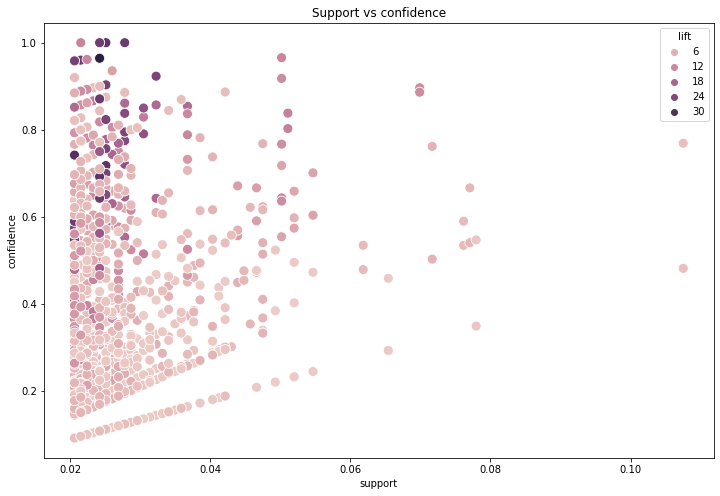

In [73]:
plt.figure(figsize = (12,8))
sns.scatterplot(x=assoc_rules['support'], y=assoc_rules['confidence'], hue = assoc_rules['lift'],s=100)
plt.title('Support vs confidence')
plt.xlabel('support')
plt.ylabel('confidence')

In [74]:
type(assoc_rules['antecedents'][0])

frozenset

In [76]:
assoc_rules[assoc_rules['antecedents']=={'SPACEBOY CHILDRENS BOWL'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
128,(SPACEBOY CHILDRENS BOWL),(DOLLY GIRL CHILDRENS BOWL),0.050179,0.037634,0.032258,0.642857,17.081633,0.030370,2.694624
134,(SPACEBOY CHILDRENS BOWL),(DOLLY GIRL CHILDRENS CUP),0.050179,0.034946,0.027778,0.553571,15.840659,0.026024,2.161720
578,(SPACEBOY CHILDRENS BOWL),(ROUND SNACK BOXES SET OF4 WOODLAND),0.050179,0.223118,0.029570,0.589286,2.641136,0.018374,1.891538
612,(SPACEBOY CHILDRENS BOWL),(SPACEBOY CHILDRENS CUP),0.050179,0.043011,0.036738,0.732143,17.022321,0.034580,3.572760
681,(SPACEBOY CHILDRENS BOWL),"(DOLLY GIRL CHILDRENS BOWL, DOLLY GIRL CHILDRENS CUP)",0.050179,0.032258,0.027778,0.553571,17.160714,0.026159,2.167742
693,(SPACEBOY CHILDRENS BOWL),"(ROUND SNACK BOXES SET OF4 WOODLAND, DOLLY GIRL CHILDRENS BOWL)",0.050179,0.021505,0.020609,0.410714,19.098214,0.019530,1.660476
699,(SPACEBOY CHILDRENS BOWL),"(SPACEBOY CHILDRENS CUP, DOLLY GIRL CHILDRENS BOWL)",0.050179,0.025090,0.024194,0.482143,19.216837,0.022935,1.882586
705,(SPACEBOY CHILDRENS BOWL),"(SPACEBOY CHILDRENS CUP, DOLLY GIRL CHILDRENS CUP)",0.050179,0.027778,0.024194,0.482143,17.357143,0.022800,1.877395
1095,(SPACEBOY CHILDRENS BOWL),"(SPACEBOY CHILDRENS CUP, ROUND SNACK BOXES SET OF4 WOODLAND)",0.050179,0.024194,0.020609,0.410714,16.976190,0.019395,1.655914
1114,(SPACEBOY CHILDRENS BOWL),"(SPACEBOY CHILDRENS CUP, DOLLY GIRL CHILDRENS BOWL, DOLLY GIRL CHILDRENS CUP)",0.050179,0.025090,0.024194,0.482143,19.216837,0.022935,1.882586


In [77]:
assoc_rules[assoc_rules['antecedents']=={'DOLLY GIRL CHILDRENS CUP','SPACEBOY CHILDRENS BOWL'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
679,"(SPACEBOY CHILDRENS BOWL, DOLLY GIRL CHILDRENS CUP)",(DOLLY GIRL CHILDRENS BOWL),0.027778,0.037634,0.027778,1.000000,26.571429,0.026732,inf
703,"(SPACEBOY CHILDRENS BOWL, DOLLY GIRL CHILDRENS CUP)",(SPACEBOY CHILDRENS CUP),0.027778,0.043011,0.024194,0.870968,20.250000,0.022999,7.416667
1110,"(SPACEBOY CHILDRENS BOWL, DOLLY GIRL CHILDRENS CUP)","(SPACEBOY CHILDRENS CUP, DOLLY GIRL CHILDRENS BOWL)",0.027778,0.025090,0.024194,0.870968,34.714286,0.023497,7.555556


In [78]:
assoc_rules[assoc_rules['consequents']=={'ALARM CLOCK BAKELIKE RED'}] #THE PRESENCE OF WHICH PRODUCT LEADS TO THIS CONSEQUENT

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(ALARM CLOCK BAKELIKE CHOCOLATE),(ALARM CLOCK BAKELIKE RED),0.026882,0.069892,0.021505,0.800000,11.446154,0.019627,4.650538
7,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.065412,0.069892,0.050179,0.767123,10.975764,0.045607,3.993991
13,(ALARM CLOCK BAKELIKE ORANGE),(ALARM CLOCK BAKELIKE RED),0.028674,0.069892,0.022401,0.781250,11.177885,0.020397,4.251920
15,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE RED),0.078853,0.069892,0.046595,0.590909,8.454545,0.041084,2.273596
27,(PLASTERS IN TIN SPACEBOY),(ALARM CLOCK BAKELIKE RED),0.115591,0.069892,0.020609,0.178295,2.550984,0.012530,1.131923
29,(ROUND SNACK BOXES SET OF4 WOODLAND),(ALARM CLOCK BAKELIKE RED),0.223118,0.069892,0.036738,0.164659,2.355885,0.021144,1.113446
31,(SPACEBOY LUNCH BOX),(ALARM CLOCK BAKELIKE RED),0.142473,0.069892,0.025090,0.176101,2.519594,0.015132,1.128909
626,"(ALARM CLOCK BAKELIKE PINK, ALARM CLOCK BAKELIKE GREEN)",(ALARM CLOCK BAKELIKE RED),0.043907,0.069892,0.036738,0.836735,11.971743,0.033670,5.696909
638,"(ALARM CLOCK BAKELIKE GREEN, ROUND SNACK BOXES SET OF4 WOODLAND)",(ALARM CLOCK BAKELIKE RED),0.029570,0.069892,0.024194,0.818182,11.706294,0.022127,5.115591
644,"(ALARM CLOCK BAKELIKE PINK, ROUND SNACK BOXES SET OF4 WOODLAND)",(ALARM CLOCK BAKELIKE RED),0.032258,0.069892,0.024194,0.750000,10.730769,0.021939,3.720430


In [79]:
frequent_items = apriori(items_df,min_support = 0.01,use_colnames = True)
frequent_items

,support,itemsets
0,0.013441,( BIRTHDAY CARD)
1,0.010753,( RETRO SPOT)
2,0.026882,(10 COLOUR SPACEBOY PEN)
3,0.017025,(12 PENCIL SMALL TUBE WOODLAND)
4,0.013441,(12 PENCILS SMALL TUBE RED RETROSPOT)
...,...,...
3541,0.016129,"(SET/6 RED SPOTTY PAPER CUPS, SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED SPOTTY PAPER PLATES, PACK OF 6 SKULL PAPER PLATES, PACK OF 6 SKULL PAPER CUPS)"
3542,0.010753,"(PLASTERS IN TIN WOODLAND ANIMALS, PLASTERS IN TIN CIRCUS PARADE, ROUND SNACK BOXES SET OF4 WOODLAND, PLASTERS IN TIN SPACEBOY, PLASTERS IN TIN STRONGMAN)"
3543,0.016129,"(PLASTERS IN TIN WOODLAND ANIMALS, ROUND SNACK BOXES SET OF 4 FRUITS, PLASTERS IN TIN CIRCUS PARADE, ROUND SNACK BOXES SET OF4 WOODLAND, PLASTERS IN TIN SPACEBOY)"
3544,0.012545,"(PLASTERS IN TIN WOODLAND ANIMALS, ROUND SNACK BOXES SET OF 4 FRUITS, PLASTERS IN TIN CIRCUS PARADE, ROUND SNACK BOXES SET OF4 WOODLAND, PLASTERS IN TIN STRONGMAN)"


In [80]:
assoc_rules = association_rules(frequent_items,metric = 'support',min_threshold = 0.01)
assoc_rules.sort_values('support',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2970,(ROUND SNACK BOXES SET OF 4 FRUITS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.139785,0.223118,0.107527,0.769231,3.447637,0.076338,3.366487
2971,(ROUND SNACK BOXES SET OF4 WOODLAND),(ROUND SNACK BOXES SET OF 4 FRUITS),0.223118,0.139785,0.107527,0.481928,3.447637,0.076338,1.660415
3050,(ROUND SNACK BOXES SET OF4 WOODLAND),(SPACEBOY LUNCH BOX),0.223118,0.142473,0.077957,0.349398,2.452376,0.046169,1.318051
3051,(SPACEBOY LUNCH BOX),(ROUND SNACK BOXES SET OF4 WOODLAND),0.142473,0.223118,0.077957,0.547170,2.452376,0.046169,1.715614
2451,(PLASTERS IN TIN SPACEBOY),(PLASTERS IN TIN WOODLAND ANIMALS),0.115591,0.142473,0.077061,0.666667,4.679245,0.060592,2.572581
...,...,...,...,...,...,...,...,...,...
2799,(SET/6 RED SPOTTY PAPER CUPS),(RED RETROSPOT PLATE),0.078853,0.042115,0.010753,0.136364,3.237911,0.007432,1.109130
2800,(SET/6 RED SPOTTY PAPER PLATES),(RED RETROSPOT PLATE),0.077957,0.042115,0.010753,0.137931,3.275128,0.007470,1.111147
2801,(RED RETROSPOT PLATE),(SET/6 RED SPOTTY PAPER PLATES),0.042115,0.077957,0.010753,0.255319,3.275128,0.007470,1.238172
2802,(RED RETROSPOT PLATE),(SPACEBOY LUNCH BOX),0.042115,0.142473,0.010753,0.255319,1.792051,0.004752,1.151536


In [82]:
round_snack_box_antecedent = assoc_rules[assoc_rules['antecedents']=={'ROUND SNACK BOXES SET OF4 WOODLAND'}]
round_snack_box_antecedent = round_snack_box_antecedent.sort_values('support',ascending =False).head(5)
round_snack_box_antecedent

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2971,(ROUND SNACK BOXES SET OF4 WOODLAND),(ROUND SNACK BOXES SET OF 4 FRUITS),0.223118,0.139785,0.107527,0.481928,3.447637,0.076338,1.660415
3050,(ROUND SNACK BOXES SET OF4 WOODLAND),(SPACEBOY LUNCH BOX),0.223118,0.142473,0.077957,0.349398,2.452376,0.046169,1.318051
2572,(ROUND SNACK BOXES SET OF4 WOODLAND),(PLASTERS IN TIN WOODLAND ANIMALS),0.223118,0.142473,0.065412,0.293173,2.057740,0.033624,1.213206
2478,(ROUND SNACK BOXES SET OF4 WOODLAND),(PLASTERS IN TIN SPACEBOY),0.223118,0.115591,0.054659,0.244980,2.119361,0.028869,1.171371
3078,(ROUND SNACK BOXES SET OF4 WOODLAND),(WOODLAND CHARLOTTE BAG),0.223118,0.104839,0.051971,0.232932,2.221810,0.028580,1.166990


Text(0, 0.5, 'Recommended Items')

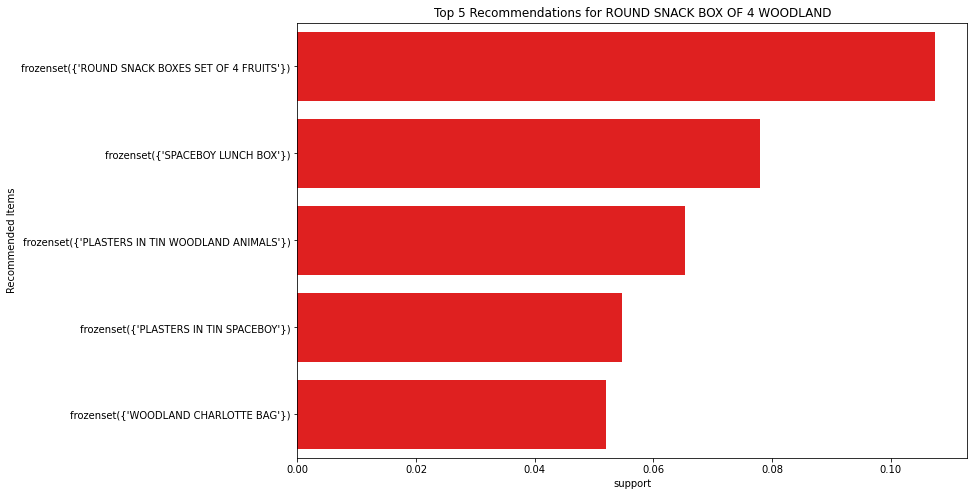

In [83]:
plt.figure(figsize = (12,8))
sns.barplot(x='support', y='consequents', data = round_snack_box_antecedent, color = 'red' )
plt.title('Top 5 Recommendations for ROUND SNACK BOX OF 4 WOODLAND')
plt.xlabel('support')
plt.ylabel('Recommended Items')